## Load the Data

In [1]:
import pandas as pd
pd.set_option("max_columns", None)

In [2]:
collisions = pd.read_csv("../data/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

In [3]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/16/2016,4:13,NaN,NaN,40.767373,-73.950057,"(40.767373, -73.9500574)",EAST 68 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Fatigued/Drowsy,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,3408932,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
2,04/16/2016,4:22,NaN,NaN,NaN,NaN,NaN,BORDEN AVENUE,58TH STREET,NaN,1,0,1,0,0,0,0,0,Passenger Distraction,NaN,NaN,NaN,NaN,3425902,NaN,NaN,NaN,NaN,NaN
3,04/16/2016,4:30,BRONX,10468.0,40.862679,-73.909040,"(40.8626793, -73.9090397)",SEDGWICK AVENUE,WEST FORDHAM ROAD,NaN,0,0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,3414396,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,04/16/2016,4:30,BROOKLYN,11249.0,40.716508,-73.961275,"(40.7165078, -73.9612751)",NaN,NaN,203 BERRY STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3421852,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [4]:
collisions_by_zipcode = collisions[['LOCATION', 'ZIP CODE']].groupby("ZIP CODE").count()

In [5]:
collisions_by_zipcode = collisions_by_zipcode.sort_values(by='LOCATION', ascending=False)

In [6]:
collisions_by_zipcode.columns = ['COLLISIONS']

In [7]:
collisions_by_zipcode.head()

,COLLISIONS
ZIP CODE,
11207.0,2083
11101.0,1623
10019.0,1570
11201.0,1528
10016.0,1526


In [8]:
%matplotlib inline

In [9]:
top_zips = collisions_by_zipcode.head(20)

## Pandas (Native)

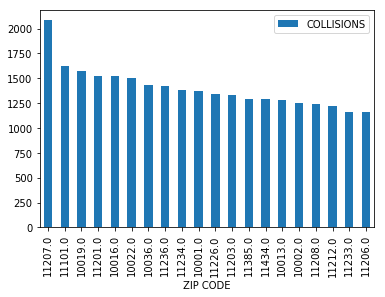

In [10]:
top_zips.plot.bar()

**Pandas Plotting** (High Level)

Advantages:
* Immediately available&mdash;doesn't require additional imports to work.

Disadvantages:
* You must get the data into the right shape yourself.

Backend: `matplotlib`

## Matplotlib

In [11]:
import matplotlib.pyplot as plt

<Container object of 20 artists>

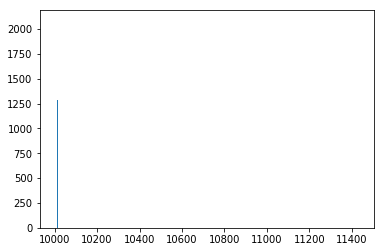

In [12]:
plt.bar(top_zips.index, top_zips.values)

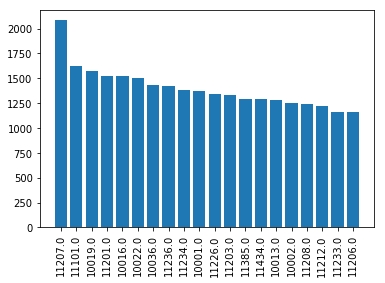

In [14]:
plt.bar(range(len(top_zips.index)), 
        top_zips.values,
        tick_label=top_zips.index)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
pass

`matplotlib`

Advantages:
* Stable do-everything API.
* Enourmous amount of examples to learn from.

## Seaborn

In [15]:
import seaborn as sns

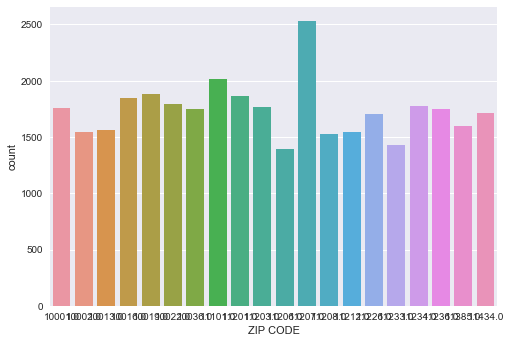

In [24]:
sns.countplot(x='ZIP CODE', data=collisions[collisions['ZIP CODE'].isin(top_zips.index)])

`seaborn`

Advantages:
* Aggregates your data for you.
* Creates nice default visuals.

Backend: `matplotlib`

## mpld3

In [31]:
import matplotlib.pyplot as plt
import mpld3

plt.bar(range(len(top_zips.index)), 
        top_zips.values,
        tick_label=top_zips.index)
ax = plt.gca()

mpld3.display()

`mpld3`

Advantages:
* Drop-in interactivity.

Disadvantages:
* Doesn't respect all `mpl` settings; breaks on more complex plots.

Backend:
`matplotlib`

In [32]:
top_zips.plot.bar()
mpld3.display()

## Bokeh

In [39]:
from bokeh.charts import Bar
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [58]:
plot = Bar(top_zips, values='COLLISIONS', legend=False)
show(plot)

Note: no easy way to sort the columns yourself...?

In [97]:
from bokeh.plotting import show, figure
from bokeh.io import output_notebook
from bokeh.models import Range1d

r = list(range(0, len(top_zips)))

plot = figure(x_range=Range1d(-1, len(top_zips)), y_range=(0, 2200))
plot.rect(r, 
          top_zips['COLLISIONS'].values / 2,  # y coordinate of the center of the rectangle
          width=0.5,
          height=top_zips['COLLISIONS'].values, 
          color ="steelblue")

show(plot)

In [89]:
# https://github.com/bokeh/bokeh/issues/1671

In [93]:
from bokeh.plotting import show, figure
from bokeh.io import output_notebook
from bokeh.models import Range1d
from bokeh.models import FixedTicker, TickFormatter
from bokeh.properties import Dict, Int, String

r = list(range(0, len(top_zips)))

from bokeh.util.compiler import CoffeeScript

class FixedTickFormatter(TickFormatter):
    """
    Class used to allow custom axis tick labels on a bokeh chart
    Extends bokeh.model.formatters.TickFormatter
    """

    COFFEESCRIPT =  """
        import {Model} from "model"
        import * as p from "core/properties"
        export class FixedTickFormatter extends Model
          type: 'FixedTickFormatter'
          doFormat: (ticks) ->
            labels = @get("labels")
            return (labels[tick] ? "" for tick in ticks)
          @define {
            labels: [ p.Any ]
          }
    """

    labels = Dict(Int, String, help="""
    A mapping of integer ticks values to their labels.
    """)

    __implementation__ = CoffeeScript(COFFEESCRIPT)
    
    
ticker = FixedTicker(ticks=[5,15,25,35,45,55])
formatter = FixedTickFormatter(labels={5: '0-10', 15: '10-20', 25: '20-30', 35: '30-40', 45: '40-50', 55: '50+'})

cbar = ColorBar(color_mapper=color_mapper, ticker=ticker, formatter=formatter,
                major_tick_out=0, major_tick_in=0, major_label_text_align='left',
                major_label_text_font_size='10pt', label_standoff=2)

plot = figure(x_range=Range1d(-1, len(top_zips)), 
              y_range=(0, 2200))
plot.rect(r, 
          top_zips['COLLISIONS'].values / 2,  # y coordinate of the center of the rectangle
          width=0.5,
          height=top_zips['COLLISIONS'].values, 
          color ="steelblue")

show(plot)

/Users/Honors/anaconda/envs/plotting-tools/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: bokeh.properties was deprecated in Bokeh 0.11.0 and will be removed, use bokeh.core.properties instead.
  warn(message)


AttributeError: unexpected attribute 'ticker' to Figure, possible attributes are above, background_fill_alpha, background_fill_color, below, border_fill_alpha, border_fill_color, css_classes, disabled, extra_x_ranges, extra_y_ranges, h_symmetry, height, hidpi, inner_height, inner_width, js_callbacks, left, lod_factor, lod_interval, lod_threshold, lod_timeout, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, name, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, plot_height, plot_width, renderers, right, sizing_mode, tags, title, title_location, tool_events, toolbar, toolbar_location, toolbar_sticky, v_symmetry, webgl, width, x_mapper_type, x_range, y_mapper_type or y_range

`bokeh`

Advantages:
* Animation and interactivity are first-class.

Disadvantages:
* Unstable; API has many corner cases and sharp edges.
* Documenation is improving, but nowhere near `mpl` good.

## pygal

In [100]:
import pygal

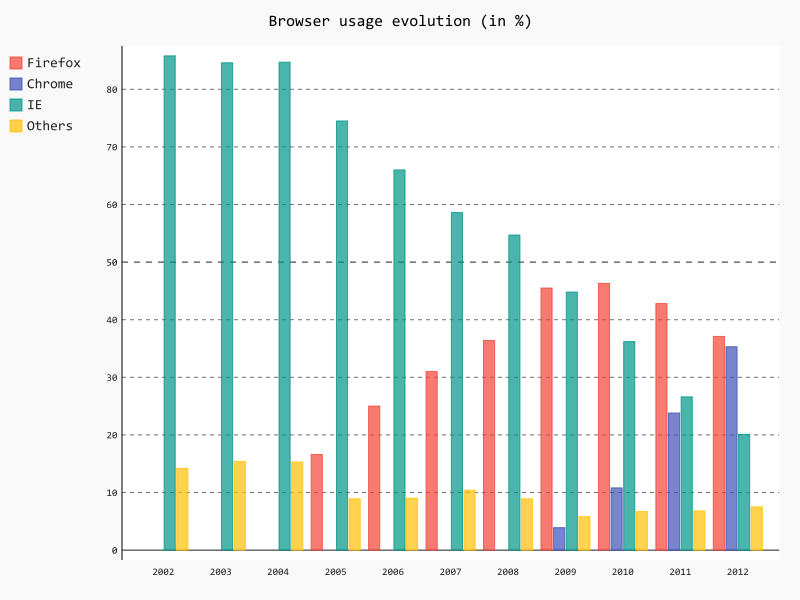

In [109]:
line_chart = pygal.Bar()
line_chart.title = 'Browser usage evolution (in %)'
line_chart.x_labels = map(str, range(2002, 2013))
line_chart.add('Firefox', [None, None, 0, 16.6,   25,   31, 36.4, 45.5, 46.3, 42.8, 37.1])
line_chart.add('Chrome',  [None, None, None, None, None, None,    0,  3.9, 10.8, 23.8, 35.3])
line_chart.add('IE',      [85.8, 84.6, 84.7, 74.5,   66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1])
line_chart.add('Others',  [14.2, 15.4, 15.3,  8.9,    9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5])

line_chart

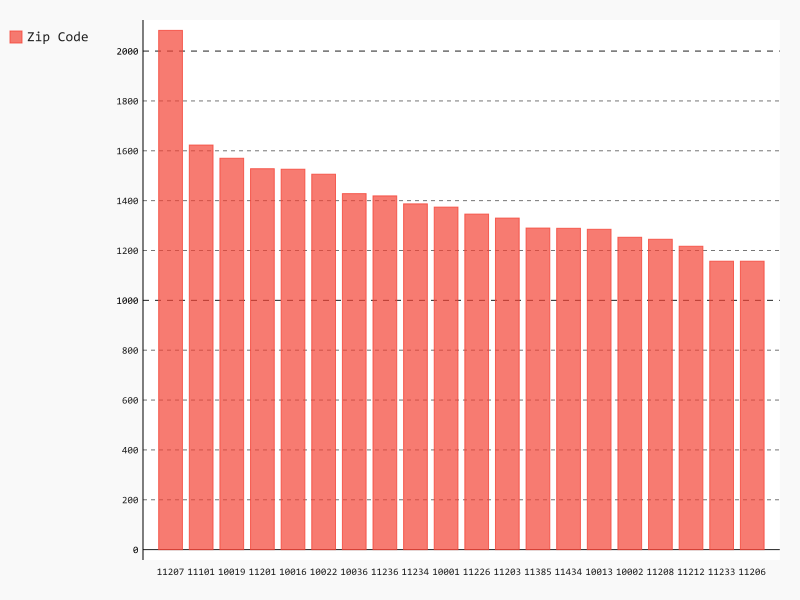

In [110]:
line_chart = pygal.Bar()
# line_chart.title = 'Browser usage evolution (in %)'
line_chart.x_labels = top_zips.index.values
line_chart.add('Zip Code', top_zips['COLLISIONS'].values)

line_chart